<a href="https://colab.research.google.com/github/aytekin827/section4_project/blob/main/project4_classification_turkish_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###필요 라이브러리 설치 및 불러오기


In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize,sent_tokenize
import re # regular expression libary.
import nltk # Natural Language toolkit
from sklearn import preprocessing
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
import warnings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [147]:
!pip install fasttext

In [ ]:
!pip install simpletransformers

# EDA

In [148]:
df = pd.read_csv('/content/drive/MyDrive/dataset/7allV03.csv',encoding='utf-8')
print(df.shape)
df.head()

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


In [149]:
# 결측치 제거
df.isna().sum()

category    0
text        0
dtype: int64

In [150]:
# 중복값 제거
df.duplicated().sum()
df = df.drop_duplicates()

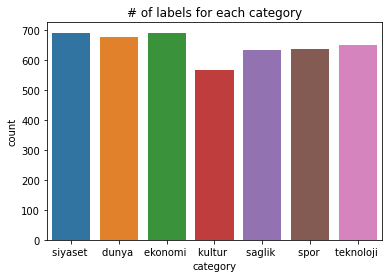

총 레이블 수 7
총 데이터 수 4540


In [151]:
sns.countplot("category",data=df)
plt.title('# of labels for each category')
plt.show() # balanced label
s = df['category'].nunique() # number of labels
n = df.shape[0]
print(f'총 레이블 수 {s}')
print(f'총 데이터 수 {n}')

# modeling & evalutaion

## Fasttext

In [ ]:
#data split for train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [154]:
train.head()

,category,text,labels
0,kultur,7 yaşındaki mercan a büyük ödül almanya nın e...,3
1,teknoloji,facebook kullanıcıları dikkat ! facebook un y...,6
2,saglik,organ bağışı vasiyeti herkesin cebinde olacak...,4
3,ekonomi,çeyrek altın kaç lira istanbul_kapalıçarşı da...,2
4,ekonomi,borsa güne yükselişle başladı istanbul_menkul...,2


In [126]:
test.head()

,category,text,labels
0,ekonomi,hollanda türkiye  nin büyümesini kıskanıyoru...,2
1,ekonomi,komşu türk turist çekmek için camileri bile o...,2
2,kultur,ünlü eser sakıncalı bulundu izmir il milli_eğ...,3
3,spor,ronaldo ile kıyaslanmaktan sıkılmış ! dünyanı...,5
4,dunya,meksika da deprem meksika nın güneyinde şidde...,1


In [127]:
#Data prepare for fasttext format for train
train["label_format"]=0
for i in range(len(train)):
    train.label_format[i]="__label__"+str(train.category[i])+" "+str(train.text[i])

In [128]:
#Data prepare for fasttext format for test
test["label_format"]=0
for i in range(len(test)):
    test.label_format[i]="__label__"+str(test.category[i])+" "+str(test.text[i])

In [129]:
train.head()

,category,text,labels,label_format
0,kultur,7 yaşındaki mercan a büyük ödül almanya nın e...,3,__label__kultur 7 yaşındaki mercan a büyük ö...
1,teknoloji,facebook kullanıcıları dikkat ! facebook un y...,6,__label__teknoloji facebook kullanıcıları di...
2,saglik,organ bağışı vasiyeti herkesin cebinde olacak...,4,__label__saglik organ bağışı vasiyeti herkes...
3,ekonomi,çeyrek altın kaç lira istanbul_kapalıçarşı da...,2,__label__ekonomi çeyrek altın kaç lira istan...
4,ekonomi,borsa güne yükselişle başladı istanbul_menkul...,2,__label__ekonomi borsa güne yükselişle başla...


In [130]:
test.head()

,category,text,labels,label_format
0,ekonomi,hollanda türkiye  nin büyümesini kıskanıyoru...,2,__label__ekonomi hollanda türkiye  nin büyü...
1,ekonomi,komşu türk turist çekmek için camileri bile o...,2,__label__ekonomi komşu türk turist çekmek iç...
2,kultur,ünlü eser sakıncalı bulundu izmir il milli_eğ...,3,__label__kultur ünlü eser sakıncalı bulundu ...
3,spor,ronaldo ile kıyaslanmaktan sıkılmış ! dünyanı...,5,__label__spor ronaldo ile kıyaslanmaktan sık...
4,dunya,meksika da deprem meksika nın güneyinde şidde...,1,__label__dunya meksika da deprem meksika nın...


In [106]:
train.label_format.to_csv('fasttext_train.txt',index=None,header=None)
test.label_format.to_csv('fasttext_test.txt',index=None,header=None)

In [107]:
import fasttext
#train classifier model
model_fasttext = fasttext.train_supervised('fasttext_train.txt',
                                           epoch=50,
                                           lr=0.05,
                                           label_prefix='__label__',
                                           dim=1000)

In [108]:
result = model_fasttext.test('fasttext_train.txt')
validation = model_fasttext.test('fasttext_test.txt')

# DISPLAY ACCURACY OF TRAINED MODEL
text_line =  "accuracy:" + str(result[1])  + ",validation:" + str(validation[1]) + '\n' 
print(text_line)
print("Accuracy:"str(result[1]))
print("Precision:",str(validation[1]))

accuracy:0.9270374449339207,validation:0.8480176211453745



## ML - RandomForest, Randomized Serach CV


In [152]:
# string label을 integer label로 변환하기
df['labels'] = pd.factorize(df.category)[0]
print(df.shape)
df.head()

(4540, 3)


,category,text,labels
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,0
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,0
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,0
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,0
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,0


In [155]:
text_list=[]

for text in df.text:
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))] # remove stopword 
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    text_list.append(text) # store sentences in list

In [156]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words

max_features=500 # most commonly used 500 words in reviews

stop_words_turkish = pd.read_csv('stop_words_turkish.txt',sep='\n',encoding='utf-8',names=['stop_words'])['stop_words'].tolist() 
# 터키어 불용어 출처 : https://countwordsfree.com/stopwords/turkish

count_vectorizer=CountVectorizer(stop_words=stop_words_turkish, max_features=max_features) 
sparce_matrix=count_vectorizer.fit_transform(text_list).toarray()
print(sparce_matrix.shape)
sparce_matrix

(4540, 500)


array([[0, 0, 0, ..., 0, 0, 2],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [157]:
print("Top {} the most used word by reviewers:\n {}".format(max_features,count_vectorizer.get_feature_names()))

Top 500 the most used word by reviewers:n\ ['aa', 'ab', 'abd', 'abdullah', 'adet', 'adlı', 'adı', 'adına', 'ahmet', 'aile', 'ait', 'ak', 'akıllı', 'alan', 'aldı', 'aldığı', 'ali', 'almak', 'almanya', 'altın', 'altına', 'altında', 'alınan', 'alıyor', 'amacıyla', 'an', 'ana', 'anadolu', 'anayasa', 'anda', 'ankara', 'anlatan', 'anlattı', 'anne', 'apple', 'aralık', 'arasında', 'arasındaki', 'araya', 'araştırma', 'ardından', 'artık', 'artış', 'arınç', 'askeri', 'avrupa', 'ay', 'aynı', 'ayında', 'açık', 'açıkladı', 'açıklama', 'açıklamada', 'açısından', 'ağır', 'bakan', 'bakanlığı', 'bakanı', 'basın', 'bağlı', 'başarılı', 'başbakan', 'başka', 'başkan', 'başkanlığı', 'başkanı', 'başladı', 'başlayan', 'başta', 'başında', 'bdp', 'belediye', 'belirten', 'belirterek', 'belirtildi', 'belirtti', 'belli', 'beşiktaş', 'bildirdi', 'bildirildi', 'bilgi', 'bilim', 'biraz', 'birlikte', 'birliği', 'boyunca', 'bugün', 'bugüne', 'bulunan', 'bulundu', 'bulunduğu', 'bulunuyor', 'bütün', 'büyük', 'büyükşehir',

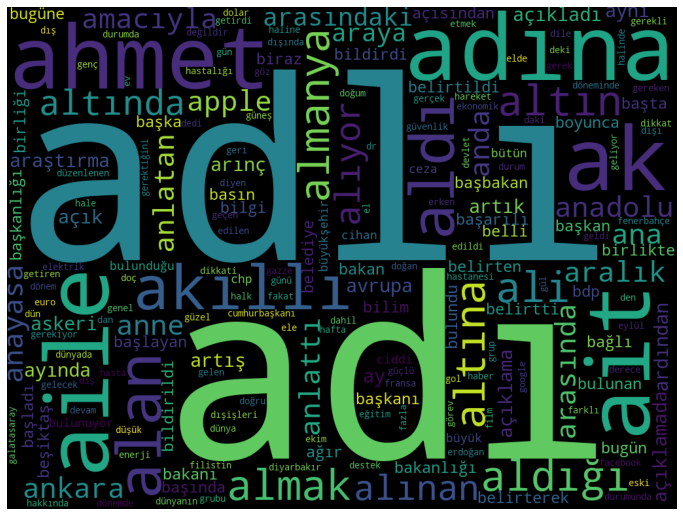

In [158]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
data=pd.DataFrame(count_vectorizer.get_feature_names(),columns=["Words"])
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(data.Words[5:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# lemmatization 이 잘 안됬음 
# adına adlı adı 
# aldığı alan  
# 두개 모두 같은 의미

In [159]:
from sklearn import preprocessing

X=sparce_matrix
le = preprocessing.LabelEncoder()
labels=le.fit_transform(df.category)
y=labels

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (3632, 500)
x_test (908, 500)
y_train (3632,)
y_test (908,)


In [217]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy: 0.8237885462555066
Precision: 0.8237885462555066


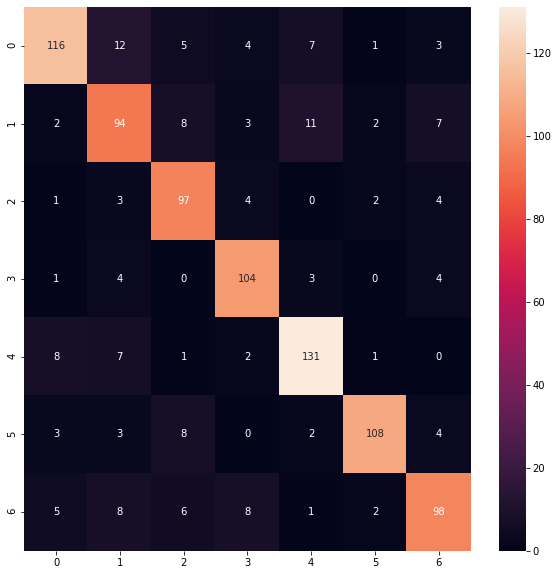

In [218]:
# result
# RandomForest model - simple
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

y_pred=rf_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d') 

In [223]:
# model fine tuning
rf_params={"max_depth":[2,5,8,10],
           "max_features":[2,5,8],
           "n_estimators":[10,500,1000],
          "min_samples_split":[2,5,10]}

In [224]:
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier(random_state=42)
rf_cv=RandomizedSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model=rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.5s finished


In [225]:
print(rf_cv_model.best_params_)
print(rf_cv_model.best_score_)

{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}
0.7946144764326584


In [226]:
rf_tuned_model=RandomForestClassifier(random_state=42,
                                      max_depth=10,
                                      max_features= 5,
                                      min_samples_split= 2,
                                      n_estimators= 1000)

rf_tuned_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy: 0.7940528634361234
Precision: 0.7940528634361234


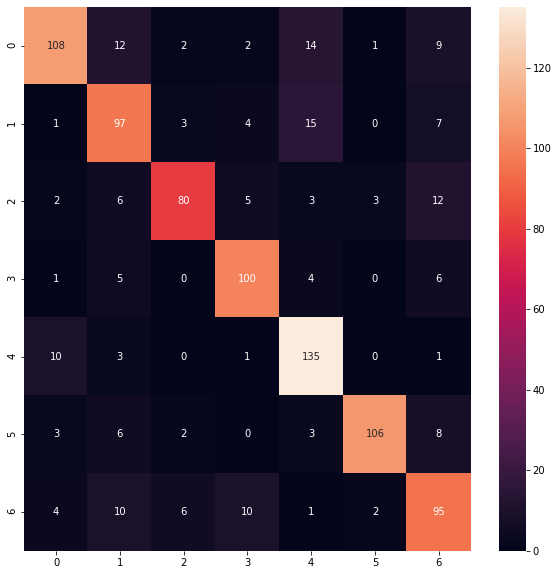

In [227]:
# result
# hyper parameter fine tuning

y_pred=rf_tuned_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d') 

## Deep learning - LSTM

In [258]:
X = df.text
X_list=[] # store text in this list

for text in X:
    text = text.lower()
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text = text.split()
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    text=" ".join(text)
    X_list.append(text) # store sentences in list

In [259]:
y_label=[]

for i in labels:
    y_label.append(i)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_list, y_label, test_size=0.2, random_state=42,shuffle=True)
print(len(X_train)) # 3920 sentences
print(len(y_train)) #3920 Labels
print(len(X_test))  # 980 sentences
print(len(y_test)) # 980 labels

3632
3632
908
908


In [261]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

max_lenght=100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index # creating word dict for words in training

sequences = tokenizer.texts_to_sequences(X_train)  # replacing words with the number corresponding to them in the dictionary(word_index)

X_train_padded = pad_sequences(sequences, padding='post',maxlen=max_lenght) # padding words

print(len(word_index)) # I have 94836 words in my dictionary

94781


In [262]:
print("Original Version:",X_train[0])
print("\n---------------------------------\n")
print("Tokenized version:",sequences[0])  # change words with number that corresponding to word word_index
print("\n---------------------------------\n")
print("Padded version",X_train_padded[0]) 
print("\n---------------------------------\n")
print("Shape after the padding:",X_train_padded.shape)

Original Version: yaşındaki mercan a büyük ödül almanya nın önemli medya ödülü olarak kabul edilen bambi ödülleri düsseldorf kentinde düzenlenen törenle yılki sahiplerini buldu hubert burda media yayın kuruluşu tarafından düzenlenen törende christian zübert in dreiviertelmond filminde hayat adlı türk kızını canlandıran yaşındaki mercan fatma türkoğlu yetenek bambi ödülüne layık görüldü minik mercan sahneye gelerek anneme okuluma öğretmenlerime bana bugün burada olmama izin verdikleri teşekkür ediyorum dedi mercan fatma türkoğlu ödülünü kendi yaşıtı olan kendisi oyunculuk yapan nina eichinger den aldı geceden kareler foto galeri yeni başlayanlar türkçe adlı film ulusal film kategorisinde bambi ödülü alırken uyum dalındaki ödülü berlin sokak ortasında arap kökenli gençler tarafından dövülen haham daniel alter aldı yeni başlayanlar türkçe adlı filmin başrol oyuncusu adnan maral türkçe yaptığı teşekkür konuşmasında teşekkür ederim dedi alman birinci televizyonu ard tarafından naklen yayınl

In [263]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,padding="post",maxlen=max_lenght)

In [264]:
print("Original Version:",X_test[0])
print("\n---------------------------------\n")
print("Tokenized version:",X_test_sequences[0])  # change words with number that corresponding to word word_index
print("\n---------------------------------\n")
print("Padded version",X_test_padded[0]) 
print("\n---------------------------------\n")
print("Shape after the padding:",X_test_padded.shape)

Original Version: hollanda türkiye nin büyümesini kıskanıyoruz hollanda başbakanı mark rutte türkiye nin hollanda nın önemli ticaret yatırım ortaklarından birisi olduğunu belirterek son yıl içinde türkiye ekonomisi büyük bir hızla büyüdü büyüme bizi kıskandırıyor dedi türkiye nin yumuşak inişi başardığını aktaran rutte türkiye halen yüzde e yakın bir büyüme kaydedebiliyor dedi iki ülkenin yıllık toplam ticaret hacminin yıllık milyar doların üzerinde olduğunu anlatan rutte cumhurbaşkanı abdullah gül başbakan recep tayyip erdoğan görüşmeler yaptık görüşmeler sadece politik meselelerden ibaret değildi aynı zamanda iki ülke arasındaki ticari ekonomik ilişkileri artırabileceğimizi görüştük konuştu rutte kredi derecelendirme kuruluşu fitch in türkiye hakkında yaptığı not artırımı dolayısıyla başbakan erdoğan ı tebrik ettiğini belirterek not artırımı türkiye güzel bir haber türkiye artık istikrarlı bir ortam sağlıyor konuştu milyar dolar başbakan yardımcısı ali babacan yılın türkiye hollanda 

In [265]:
y_train_label=np.asarray(y_train).reshape(-1,1)
y_test_label=np.asarray(y_test).reshape(-1,1)

In [295]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index)+1
embedding_dim=16

model_lstm2 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(7, activation='softmax')
])

model_lstm2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 16)           1516512   
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 903       
Total params: 1,591,655
Trainable params: 1,591,655
Non-trainable params: 0
_________________________________________________________________


In [296]:
num_epochs = 10
BATCH_SIZE=64
history=model_lstm2.fit(X_train_padded,y_train_label,batch_size=BATCH_SIZE ,epochs=num_epochs, validation_data=(X_test_padded,y_test_label))

Epoch 1/10
57/57 [==============================] - 20s 319ms/step - loss: 1.9283 - accuracy: 0.2015 - val_loss: 1.9110 - val_accuracy: 0.2687
Epoch 2/10
57/57 [==============================] - 18s 313ms/step - loss: 1.7826 - accuracy: 0.3285 - val_loss: 1.6676 - val_accuracy: 0.2996
Epoch 3/10
57/57 [==============================] - 18s 314ms/step - loss: 1.4290 - accuracy: 0.3756 - val_loss: 1.4837 - val_accuracy: 0.3656
Epoch 4/10
57/57 [==============================] - 18s 315ms/step - loss: 1.1923 - accuracy: 0.5490 - val_loss: 1.3047 - val_accuracy: 0.5341
Epoch 5/10
57/57 [==============================] - 18s 313ms/step - loss: 0.9136 - accuracy: 0.6977 - val_loss: 1.8307 - val_accuracy: 0.4174
Epoch 6/10
57/57 [==============================] - 18s 314ms/step - loss: 0.7788 - accuracy: 0.7415 - val_loss: 1.2861 - val_accuracy: 0.5319
Epoch 7/10
57/57 [==============================] - 18s 314ms/step - loss: 0.5625 - accuracy: 0.8373 - val_loss: 1.2099 - val_accuracy: 0.5991

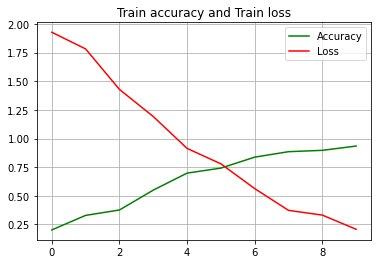

In [299]:
# model_lstm
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color="green")
plt.plot(history.history["loss"],color="red")
plt.title("Train accuracy and Train loss")
plt.legend(["Accuracy","Loss"])
plt.grid()


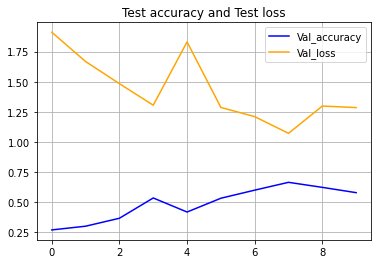

In [300]:
# model_lstm
plt.plot(history.history["val_accuracy"],color="blue")
plt.plot(history.history["val_loss"],color="orange")
plt.title("Test accuracy and Test loss")
plt.legend(["Val_accuracy","Val_loss"])
plt.grid()

In [270]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index)+1
embedding_dim=16

model_lstm2 = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

adam= tf.keras.optimizers.Adam(lr=0.01) 

model_lstm2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 16)           1516512   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)               

In [271]:
num_epochs = 10
BATCH_SIZE=64
history2=model_lstm2.fit(X_train_padded,y_train_label,batch_size=BATCH_SIZE ,epochs=num_epochs, validation_data=(X_test_padded,y_test_label))

Epoch 1/10
57/57 [==============================] - 4s 26ms/step - loss: 2.1133 - accuracy: 0.1842 - val_loss: 1.9426 - val_accuracy: 0.1377
Epoch 2/10
57/57 [==============================] - 1s 12ms/step - loss: 1.1578 - accuracy: 0.5625 - val_loss: 1.8110 - val_accuracy: 0.2390
Epoch 3/10
57/57 [==============================] - 1s 12ms/step - loss: 0.3663 - accuracy: 0.8816 - val_loss: 1.3814 - val_accuracy: 0.5374
Epoch 4/10
57/57 [==============================] - 1s 12ms/step - loss: 0.1052 - accuracy: 0.9747 - val_loss: 0.8758 - val_accuracy: 0.7026
Epoch 5/10
57/57 [==============================] - 1s 12ms/step - loss: 0.0450 - accuracy: 0.9920 - val_loss: 0.8822 - val_accuracy: 0.7070
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0332 - accuracy: 0.9909 - val_loss: 0.8317 - val_accuracy: 0.7258
Epoch 7/10
57/57 [==============================] - 1s 12ms/step - loss: 0.0232 - accuracy: 0.9950 - val_loss: 0.9833 - val_accuracy: 0.7126
Epoch 8/10
57

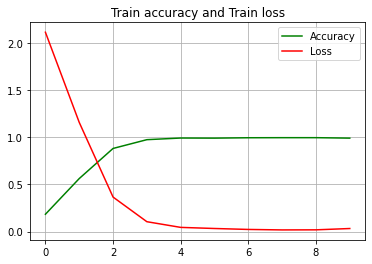

In [275]:
# model_lstm2
import matplotlib.pyplot as plt

plt.plot(history2.history["accuracy"],color="green")
plt.plot(history2.history["loss"],color="red")
plt.title("Train accuracy and Train loss")
plt.legend(["Accuracy","Loss"])
plt.grid()

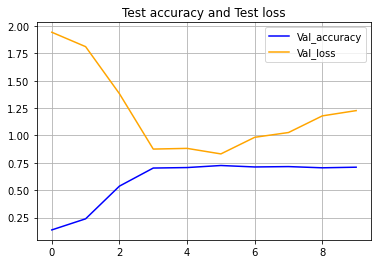

In [274]:
# model_lstm2
plt.plot(history2.history["val_accuracy"],color="blue")
plt.plot(history2.history["val_loss"],color="orange")
plt.title("Test accuracy and Test loss")
plt.legend(["Val_accuracy","Val_loss"])
plt.grid()

114/114 [==============================] - 1s 5ms/step - loss: 0.0178 - accuracy: 0.9956
Accuracy of the model on Training Data is -  99.55947399139404 %
29/29 [==============================] - 0s 4ms/step - loss: 1.4535 - accuracy: 0.6399
Accuracy of the model on Testing Data is -  63.98678421974182 %


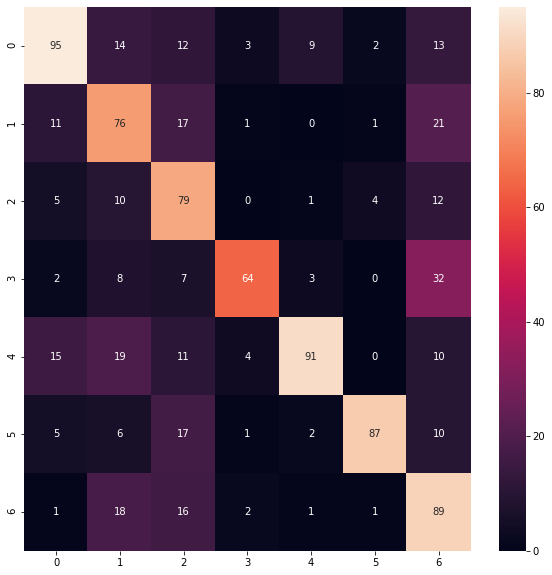

In [285]:
print("Accuracy of the model on Training Data is - " , model_lstm3.evaluate(X_train_padded,y_train_label)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm3.evaluate(X_test_padded,y_test_label)[1]*100 , "%")

pred = np.argmax(model_lstm2.predict(X_test_padded),axis=1)
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linecolor="white",fmt='')
# overfitted on training data

## Deep learning - BERTurkish


In [287]:
from simpletransformers.classification import ClassificationModel

In [288]:
#for bert text column should be string and label column should be int
train["text"]=train["text"].apply(lambda r: str(r))
train['labels']=train['labels'].astype(int)

In [289]:
#create model with turkish bert - transfer learning
model = ClassificationModel('bert', 'dbmdz/bert-base-turkish-uncased', num_labels=7,use_cuda=False,
                            args={'reprocess_input_data': True, 
                                  'overwrite_output_dir': True, 
                                  'num_train_epochs': 3, 
                                  "train_batch_size": 64 , 
                                  "fp16":False,
                                  "output_dir": "bert_model"})

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

In [290]:
#train model
model.train_model(train)

  0%|          | 0/3632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

(171, 0.42494775568358384)

In [291]:
result, model_outputs, wrong_predictions = model.eval_model(test)

  0%|          | 0/908 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/114 [00:00<?, ?it/s]

In [ ]:
from sklearn import metrics
print(metrics.classification_report(actuals, predictions, digits=3))

In [293]:
from sklearn.metrics import accuracy_score
predictions = model_outputs.argmax(axis=1)
actuals = test.labels.values
print(metrics.classification_report(actuals, predictions, digits=3))
accuracy_score(actuals, predictions)

              precision    recall  f1-score   support

           0      0.913     0.907     0.910       150
           1      0.934     0.865     0.898       148
           2      0.841     0.835     0.838       127
           3      0.922     0.964     0.943       111
           4      0.940     0.948     0.944       116
           5      0.977     0.992     0.984       128
           6      0.895     0.930     0.912       128

    accuracy                          0.917       908
   macro avg      0.918     0.920     0.918       908
weighted avg      0.917     0.917     0.917       908



0.9174008810572687